# Analyse du catalogue Netflix - Projet de Data Cleaning

## Contexte du projet
Ce notebook est la suite logique de mon travail de data cleaning sur le catalogue Netflix. Après avoir nettoyé et préparé les données dans netflix_data_cleaning.ipynb, j'explore maintenant les patterns et tendances du catalogue à travers des visualisations interactives avec Plotly.

## Objectifs pédagogiques

- Maîtriser Plotly Express pour créer des visualisations interactives variées
- Analyser les distributions temporelles, géographiques et par catégories
- Extraire des insights pertinents à partir de données nettoyées
- Utiliser différents types de graphiques adaptés au contexte (histogrammes, line charts, box plots, treemaps, scatter plots, cartes choroplèthes)
- Structurer un workflow modulaire en important des données depuis un fichier nettoyé

## Dataset
Le dataset contient 8809 titres Netflix (films et séries) avec des informations sur les réalisateurs, le casting, les pays de production, les dates d'ajout, les durées et les catégories.

**Source** : Netflix Titles Dataset  
**Période** : Janvier 2026  
**Niveau** : Apprentissage - Focus sur data viz


# Data Visualisation

In [240]:
import pandas as pd
import plotly.express as px
import numpy as np

## Étape 1 : Import du fichier nettoyé

In [132]:
df_viz = pd.read_csv('../data/processed/netflix_titles_cleaned.csv')
df_viz.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_movies,duration_tv_show,year_added,month_added,day_of_the_week_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",90.0,NaN,2021.0,9.0,5.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,2.0,2021.0,9.0,4.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,NaN,1.0,2021.0,9.0,4.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",NaN,1.0,2021.0,9.0,4.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,NaN,2.0,2021.0,9.0,4.0


## Étape 2 : Création d'une copie de travail
Je crée une copie du DataFrame original pour conserver les données brutes intactes.

In [133]:
df_viz_wip = df_viz.copy()
df_viz_wip.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_movies,duration_tv_show,year_added,month_added,day_of_the_week_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",90.0,NaN,2021.0,9.0,5.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,2.0,2021.0,9.0,4.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,NaN,1.0,2021.0,9.0,4.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",NaN,1.0,2021.0,9.0,4.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,NaN,2.0,2021.0,9.0,4.0


In [134]:
df_viz_wip = df_viz_wip[(df_viz_wip['year_added'] <= 2021) | (df_viz_wip['year_added'].isna())]
print(f"Lignes après 2021: {len(df_viz_wip[df_viz_wip['year_added'] > 2021])}")
print(f"Année maximum: {df_viz_wip['year_added'].max()}")
print(df_viz_wip['year_added'].value_counts().sort_index().tail(5))

Lignes après 2021: 0
Année maximum: 2021.0
year_added
2017.0    1164
2018.0    1625
2019.0    1999
2020.0    1878
2021.0    1498
Name: count, dtype: int64


# DATA VISUALISATION

## Comparaison Films vs Séries par année de sortie

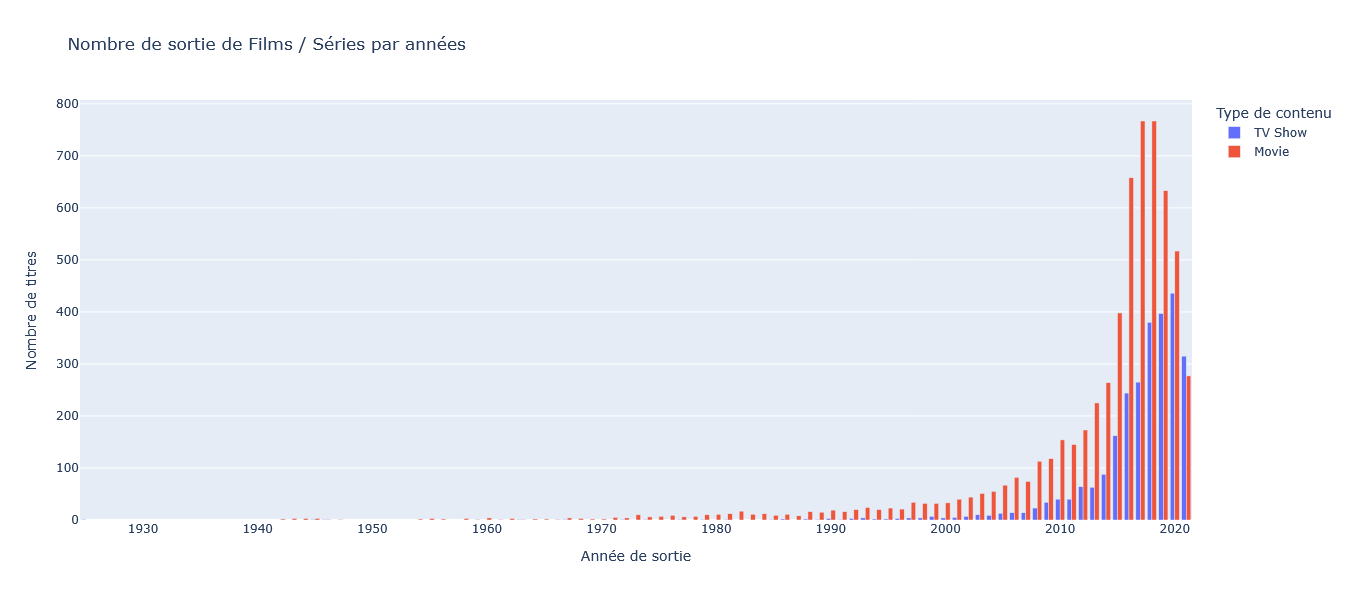

In [135]:
# Agrégation par année et type de contenu
nb_per_year = pd.pivot_table(df_viz_wip, values='show_id', 
                             columns='type', 
                             index='release_year', 
                             aggfunc='count').reset_index()

# Visualisation en barres groupées
fig = px.bar(nb_per_year,
             x='release_year',
             y=['TV Show', 'Movie'],
             title='Nombre de sortie de Films / Séries par années',
             labels={
                'release_year': 'Année de sortie',
                'value': 'Nombre de titres',
                'variable': 'Type de contenu'
                },
             barmode='group')


fig.update_layout(
    width=1280,
    height=600,
    autosize=False,
    hovermode='x unified'
)
fig.show()

### Analyse de l'évolution du catalogue

**Observations clés :**

- **Explosion récente** : Croissance massive après 2015, avec un pic en 2019 (environ 750 sorties)
- **Domination Films** : Les films représentent la majorité du catalogue jusqu'en 2020
- **Montée des Séries** : Forte augmentation des séries (bleu) à partir de 2016, rattrapage progressif
- **Contenu moderne** : Quasi-absence de contenu avant 1980, focus sur productions récentes (2000+)

## Analyse temporelle des ajouts Netflix (2008-2021)

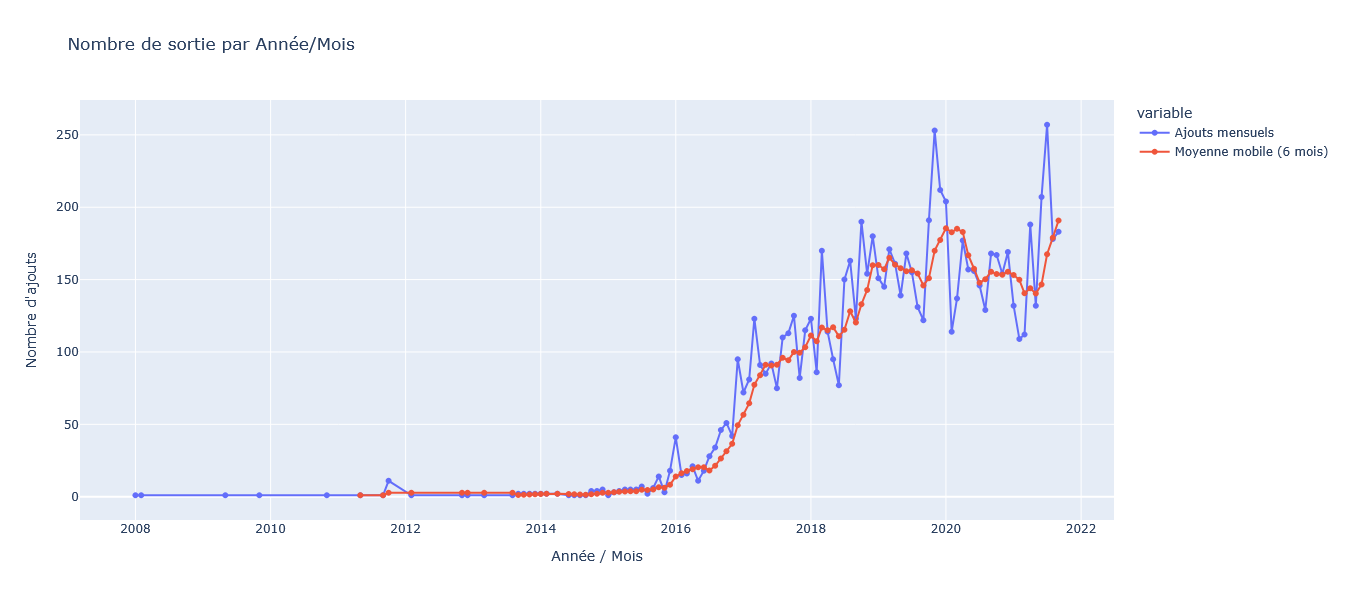

In [138]:
# Préparation des données temporelles
df_temp = df_viz_wip.dropna(subset=['year_added', 'month_added']).copy()

# Création de la série temporelle mensuelle
df_temp['year_month'] = (
    df_temp['year_added'].astype(int).astype(str) + '-' + 
    df_temp['month_added'].astype(int).astype(str).str.zfill(2)
)

count_per_year_month = df_temp['year_month'].value_counts().sort_index().reset_index()

# Lissage par moyenne mobile (6 mois) pour réduire la volatilité mensuelle
count_per_year_month['rolling_avg'] = count_per_year_month['count'].rolling(window=6).mean()

# Renommage pour visualisation
count_per_year_month_renamed = count_per_year_month.rename(columns={
    'count': 'Ajouts mensuels',
    'rolling_avg': 'Moyenne mobile (6 mois)'
})

# Visualisation avec double série
fig = px.line(count_per_year_month_renamed,
              x='year_month',
              y=['Ajouts mensuels', 'Moyenne mobile (6 mois)'],
              title='Nombre de sortie par Année/Mois',
              labels={'year_month': 'Année / Mois', 
                      'value': 'Nombre d\'ajouts'},
              markers=True)

fig.update_layout(width=1280, height=600, autosize=False, hovermode='x unified')
fig.show()

### Analyse de la tendance d'acquisition mensuelle

**Observations clés :**

- **Forte volatilité mensuelle** : Pics et creux importants d'ajout mensuel montrent une acquisition irrégulière
- **Moyenne mobile** : La courbe rouge (moyenne mobile sur 6 mois) révèle une tendance stable malgré les fluctuations

## Distribution de la durée des films

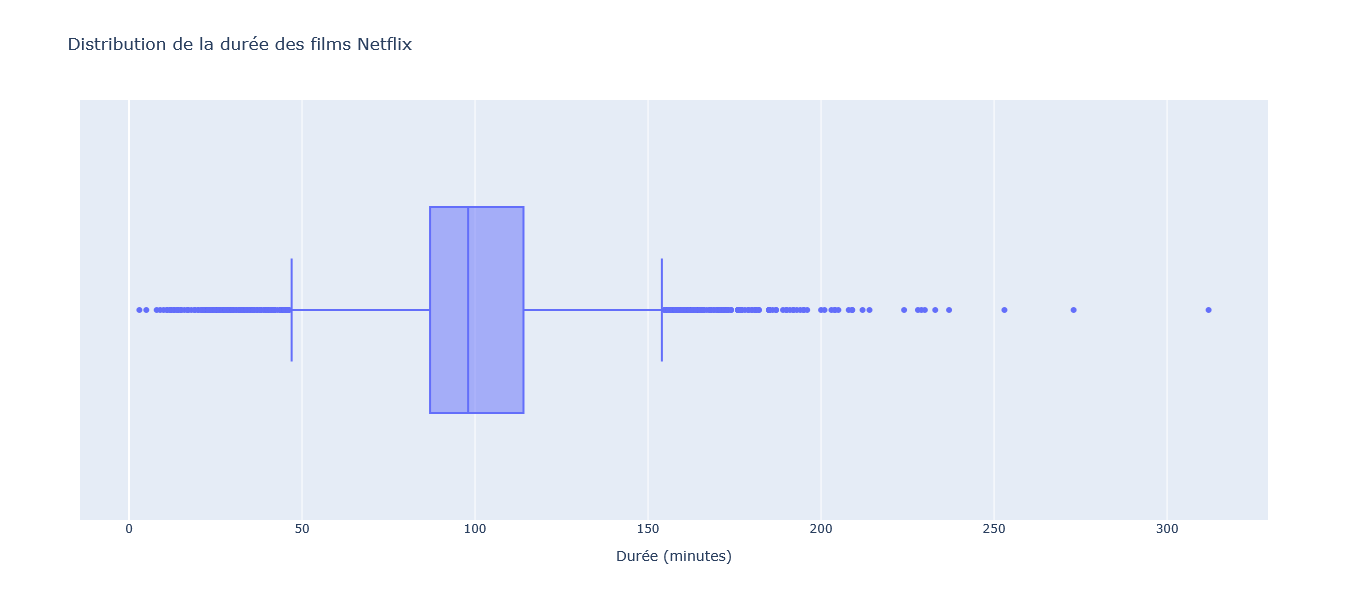

In [271]:
# Filtre sur les films uniquement
movies_only = df_viz_wip[df_viz_wip['type'] == 'Movie']

# Boxplot horizontal pour analyser la distribution
fig = px.box(movies_only,
            x='duration_movies',
            labels={'duration_movies': 'Durée (minutes)'},
            title='Distribution de la durée des films Netflix')

fig.update_layout(
    width=800,
    height=600,
    autosize=False,
    hovermode='closest'
)

fig.show()

In [163]:
# Verification Outlier +300 minutes
long_movie = movies_only[movies_only['duration_movies'] == 312]
print(long_movie[['title', 'duration_movies', 'release_year', 'country']])

# Verification Outlier Mini 3 minutes :
shortest_movie = movies_only[movies_only['duration_movies'] == 3]
print(shortest_movie[['title', 'duration_movies', 'release_year', 'country']])

                           title  duration_movies  release_year        country
4253  Black Mirror: Bandersnatch            312.0          2018  United States
       title  duration_movies  release_year        country
3777  Silent              3.0          2014  United States


### Analyse de la distribution

**Statistiques clés :**
- Médiane : 98 minutes (durée typique d'un film Netflix)
- Q1-Q3 : 87-114 minutes (50% des films)
- Outliers : < 47 min et > 154 min

**Observations :**
- Film le plus court : *Silent* (3 min) - court-métrage
- Film le plus long : *Black Mirror: Bandersnatch* (312 min) - film interactif
- Distribution légèrement asymétrique vers les films longs

## Répartition des contenus par genre

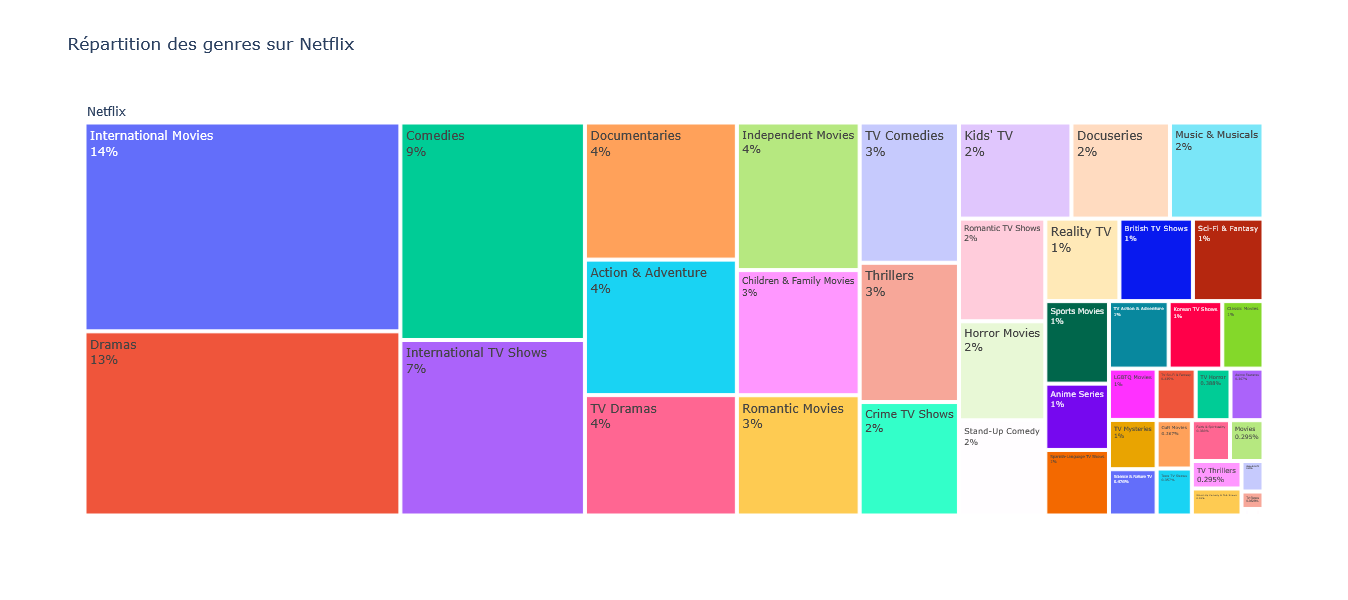

In [205]:
# Import du dataset avec genres explosés (un genre par ligne par titre)
categories_exploded = pd.read_csv('../data/auxiliary/categories_exploded.csv')

# Comptage de tous les genres (pas de limitation)
count_categories = categories_exploded['listed_in_list'].value_counts().reset_index()
count_categories.columns = ['genre', 'count']

# Treemap hiérarchique pour afficher tous les genres proportionnellement
fig = px.treemap(count_categories,
                path=[px.Constant("Netflix"), 'genre'],
                values='count',
                title='Répartition des genres sur Netflix')

# Configuration du hover: nom, nombre et pourcentage
fig.update_traces(
    textinfo='label+percent parent',
    hovertemplate='%{label}<br>%{value} titres<br>%{percentRoot:.1%}'
)

fig.update_layout(
    width=900,
    height=600,
    autosize=False
)

fig.show()

#### Analyse de la distribution

- International Movies (14.2%) : genre dominant, reflète la stratégie mondiale de Netflix
- Dramas (12.8%) et Comedies (9.3%) : genres incontournables
- Les 5 premiers genres concentrent ~50% du catalogue
- Plus de 40 genres distincts au catalogue
- Nombreux genres de niche (< 2%) permettant de cibler tous les publics


## Évolution Netflix par pays

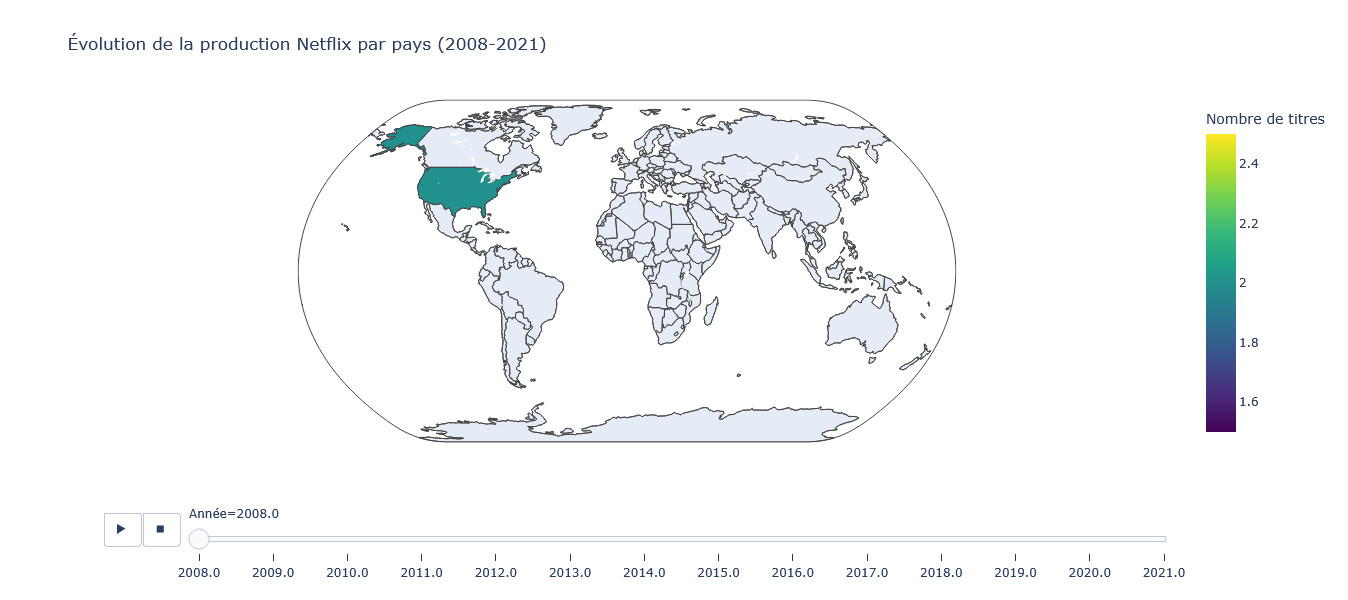

In [262]:
# Import du fichier de référence des codes ISO par pays
countries_iso = pd.read_csv('../data/iso_codes/country_iso_codes.csv')

# Fusion avec les codes ISO pour géolocalisation (inner = uniquement pays matchés)
countries_with_iso = pd.merge(
    df_viz_wip, 
    countries_iso, 
    left_on='country', 
    right_on="Country", 
    how='inner'
).drop(columns='Country')

# Sélection des colonnes nécessaires
netflix_geo = countries_with_iso[['show_id', 'country', 'ISO Alpha-3 Code', 'type', 'year_added']]

# Agrégation : nombre total de titres par pays et par année
country_year_total = netflix_geo.groupby(['ISO Alpha-3 Code', 'year_added']).size().reset_index(name='count')
country_year_total = country_year_total.sort_values('year_added', ascending=True)

# Création de la carte choropleth animée
fig = px.choropleth(
    country_year_total,
    locations='ISO Alpha-3 Code',
    locationmode='ISO-3',
    color='count',
    color_continuous_scale='Viridis',
    animation_frame='year_added',
    title='Évolution de la production Netflix par pays (2008-2021)',
    labels={'count': 'Nombre de titres', 'year_added': 'Année'}
)

fig.update_geos(
    projection_type='natural earth',
    showcountries=True
)

fig.update_layout(
    width=1000,
    height=600
)

fig.show()

#### Expansion géographique de Netflix (2008-2021)

- Domination américaine logique : USA maintient 300+ titres/an (Netflix = entreprise californienne, infrastructures historiques)
- Tournant stratégique 2016 : explosion du nombre de pays producteurs. (Inde, Corée du Sud, Brésil)
- Geolocalisation accélérée : passage de 3-4 pays en 2008 à 50+ en 2021.
- Zones blanches révélatrices : Afrique et Asie centrale quasi absentes.
- Réponse concurrentielle : intensification 2019-2021 face à Disney+ et HBO Max.